## Read and Plotting the surface mean of DMS from CMIP data

### importing modules

In [43]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import cartopy
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import s3fs
%matplotlib inline

### open CMIP6 online catalog and read the areacello data for CNRM-ESM2-1

In [44]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(source_id=['CNRM-ESM2-1'], activity_id = ['CMIP'], 
                 experiment_id=['historical'], 
                 table_id=['Ofx'], variable_id=['areacello'], 
                 member_id=['r1i1p1f2'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [45]:
ds_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [68]:
areacello = ds_dict[list(ds_dict.keys())[0]]
ds_dict.keys()
areacello = areacello.squeeze()
areacello

<xarray.Dataset>
Dimensions:     (y: 294, x: 362, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(294, 362), meta=np.ndarray>
Attributes: (12/56)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    xios_commit:             1442-shuffle
    status:                  2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:     hdl:21.14100/4e2f1651-782d-48b3-ba43-287dd16d7fe8
    version_id:              v20181206
    intake_esm_varname:      ['areacello']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

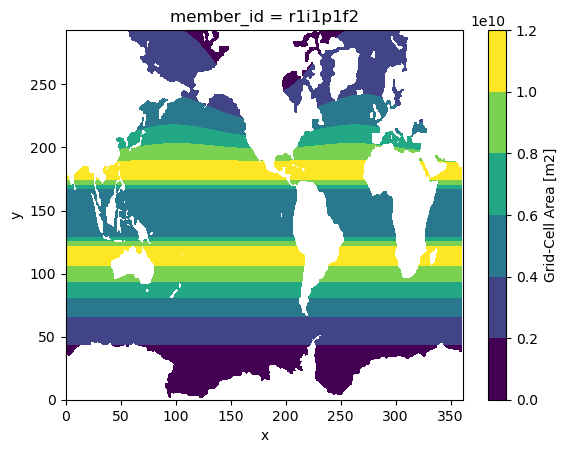

In [47]:
areacello.areacello.plot.contourf()

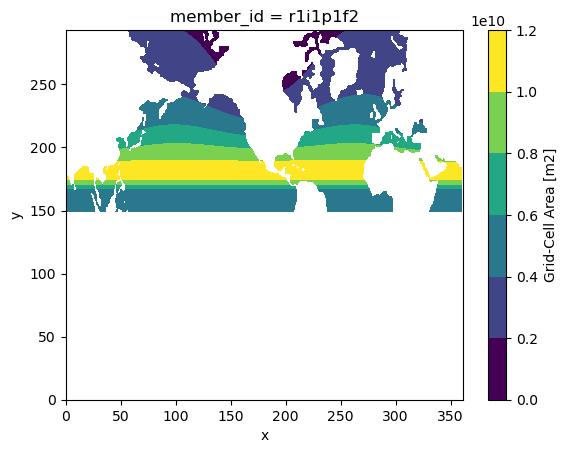

In [48]:
NHarea = areacello.areacello.where(areacello.lat>0)
NHarea.plot.contourf()

In [49]:
Arctarea = areacello.areacello.where((areacello.lat>=40) 
                                     & (areacello.lat<=90) 
                                     & (areacello.lon <=180)  
                                     & (areacello.lon >= -180))
Arctarea


<xarray.DataArray 'areacello' (y: 294, x: 362)>
dask.array<where, shape=(294, 362), dtype=float32, chunksize=(294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id  <U8 'r1i1p1f2'
Dimensions without coordinates: y, x
Attributes:
    cell_methods:      area: sum
    description:       Cell areas for any grid used to report ocean variables...
    history:           none
    long_name:         Grid-Cell Area
    online_operation:  once
    standard_name:     cell_area
    units:             m2

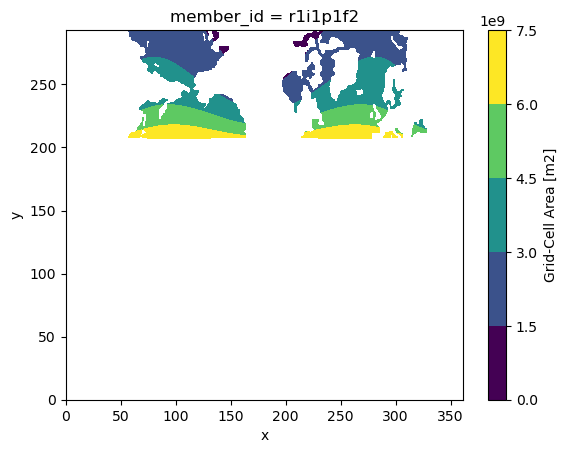

In [50]:
Arctarea.plot.contourf()

In [51]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(variable_id=['dmso'],experiment_id=['historical'])
#cat = col.search(variable_id=['emidms'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [69]:
cat = col.search(variable_id=['dmso'],source_id=['CNRM-ESM2-1'],
 activity_id = ['CMIP'], experiment_id=['historical'], table_id=['Omon'] 
#                  ,member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Omon,dmso,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [53]:
dmsset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [54]:
list(dmsset_dict.keys())

['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']

In [55]:
dmsset = dmsset_dict['CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn']
dmsset = dmsset.isel(lev=0).squeeze()
dmsset

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [38]:
year_length = dmsset.time.dt.days_in_month
weights = year_length.groupby("time.year") / year_length.groupby("time.year").sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.groupby("time.year").sum().values, np.ones(len(np.unique(dmsset.time.dt.year))))
# Calculate the weighted average:
yeargrouped_dmsset = (dmsset.dmso * weights).groupby("time.year").sum(dim="time")
yeargrouped_dmsset

<xarray.DataArray (year: 165, y: 294, x: 362)>
dask.array<transpose, shape=(165, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
Dimensions without coordinates: y, x

#### Here we see that wegtdmsset contains data for 165 years, but we only need the last 5 years, so let's remove the first 160 years. This is needed to compare with the avialble observations from Gali et al 2019.

In [15]:
wegtdmsset_2010To2014 = wegtdmsset.isel(year = slice(1,None))
wegtdmsset_2010To2014

<xarray.DataArray (year: 164, y: 294, x: 362)>
dask.array<getitem, shape=(164, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
Dimensions without coordinates: y, x

### Let's start with the global mean SST 
#### One needs to use the area of the grid cells as weights

In [16]:
wegtdmsset_2010To2014_GlbMean= (areacello.areacello*wegtdmsset_2010To2014
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y'))
wegtdmsset_2010To2014_GlbMean

<xarray.DataArray (year: 164)>
dask.array<truediv, shape=(164,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
  * year       (year) int64 1851 1852 1853 1854 1855 ... 2011 2012 2013 2014

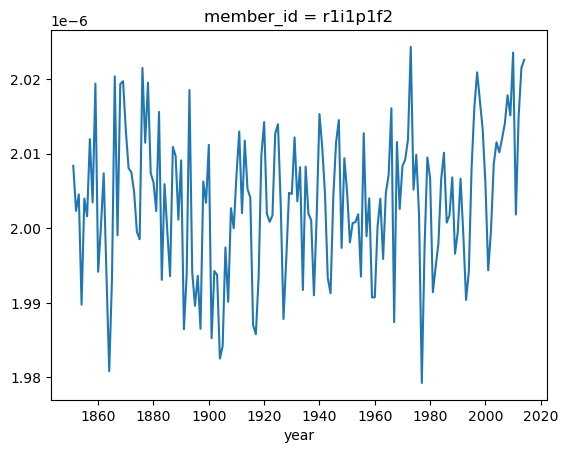

In [17]:
wegtdmsset_2010To2014_GlbMean.plot(x='year')

### choose the Arctic

In [18]:
Arct_wegtdmsset_2010To2014_GlbMean = wegtdmsset_2010To2014.where((wegtdmsset_2010To2014.lat>=40)
                                                                         & (wegtdmsset_2010To2014.lat<=90) 
                                                                         & (wegtdmsset_2010To2014.lon <= 180 )  
                                                                         & (wegtdmsset_2010To2014.lon >= -180))
Arct_wegtdmsset_2010To2014_GlbMean


<xarray.DataArray (year: 164, y: 294, x: 362)>
dask.array<where, shape=(164, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
Dimensions without coordinates: y, x

In [19]:
Arct_wegtdmsset_2010To2014_GlbMean

<xarray.DataArray (year: 164, y: 294, x: 362)>
dask.array<where, shape=(164, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * year     (year) int64 1851 1852 1853 1854 1855 ... 2010 2011 2012 2013 2014
Dimensions without coordinates: y, x

In [20]:
DMS_Arct_GlbMean_histrorical=Arct_wegtdmsset_2010To2014_GlbMean.mean(dim='year')
DMS_Arct_GlbMean_histrorical

<xarray.DataArray (y: 294, x: 362)>
dask.array<mean_agg-aggregate, shape=(294, 362), dtype=float64, chunksize=(294, 362), chunktype=numpy.ndarray>
Coordinates:
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
Dimensions without coordinates: y, x

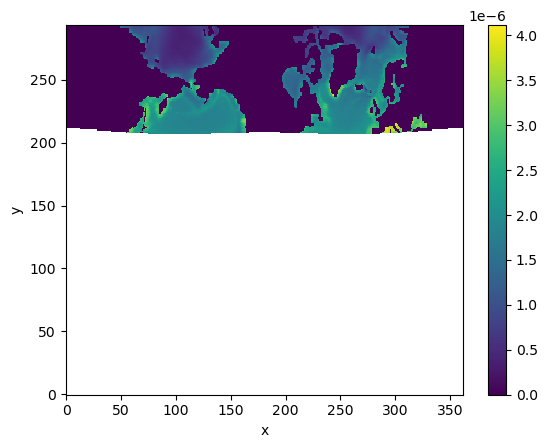

In [22]:
DMS_Arct_GlbMean_histrorical.plot.pcolormesh()

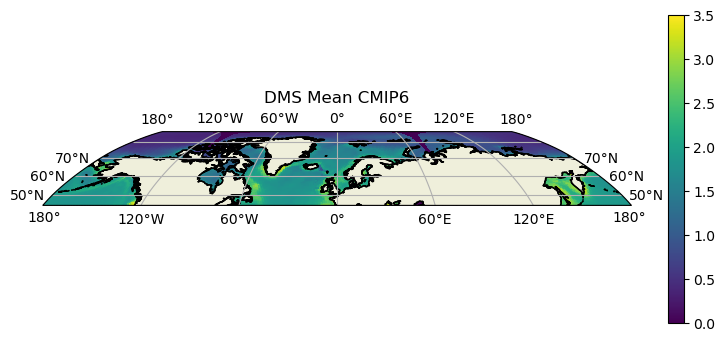

In [29]:

fig, ax = plt.subplots(figsize=(8,8),subplot_kw={'projection':ccrs.Robinson()})
#                                                 ccrs.Orthographic(45, 90)})#ccrs.NorthPolarStereo()})
ax.set_extent([-180, 180,45,90], ccrs.PlateCarree())



pl_CMIP6=ax.pcolormesh(
    np.unwrap(DMS_Arct_GlbMean_histrorical.lon, period=360),
    DMS_Arct_GlbMean_histrorical.lat,
              1.0e6*DMS_Arct_GlbMean_histrorical.where(DMS_Arct_GlbMean_histrorical.lat<89), 
    vmin=0,vmax=3.5,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax.set_title('DMS Mean CMIP6')
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.colorbar(pl_CMIP6,shrink=0.4)
fig.tight_layout()

In [24]:
#BSsst = (BSarea*BSsst).sum(dim=('i','j'))/BSarea.sum(dim=('i','j'))
Arct_wegtdmsset_2010To2014_GlbMean=(Arct_wegtdmsset_2010To2014_GlbMean*Arctarea).sum(dim=('x','y')
                                                                            )/Arctarea.sum(dim=('x','y'))
Arct_wegtdmsset_2010To2014_GlbMean

<xarray.DataArray (year: 164)>
dask.array<truediv, shape=(164,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year       (year) int64 1851 1852 1853 1854 1855 ... 2011 2012 2013 2014
    member_id  <U8 'r1i1p1f2'

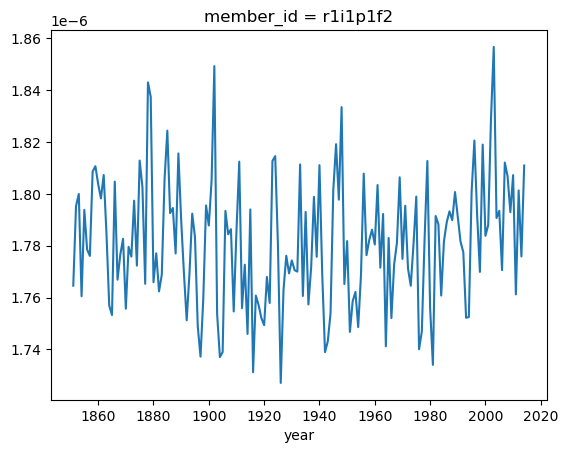

In [22]:
Arct_wegtdmsset_2010To2014_GlbMean.plot(x='year')

In [31]:
da_monthly_mean = dmsset.groupby('time.month').mean(dim='time')
da_monthly_mean

<xarray.Dataset>
Dimensions:     (month: 12, y: 294, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev         float64 0.5058
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U8 'r1i1p1f2'
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lev_bounds  (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * month       (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso        (month, y, x) float32 dask.array<chunksize=(1, 294, 362), meta=np.ndarray>

In [32]:
dmsset


<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [16]:
da_monthly=dmsset.resample(time='M').mean()
da_monthly = da_monthly.load()
da_monthly

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


<xarray.Dataset>
Dimensions:     (time: 1980, y: 294, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lon  (y, x, nvertex) float64 72.5 72.5 72.5 72.5 ... 73.0 72.95 73.0
    lat         (y, x) float64 -78.79 -78.79 -78.79 -78.79 ... 50.23 50.01 50.01
    lev         float64 0.5058
    lon         (y, x) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    member_id   <U8 'r1i1p1f2'
    bounds_lat  (y, x, nvertex) float64 -78.79 -78.79 -78.79 ... 50.11 49.98
    lev_bounds  (axis_nbounds) float64 0.0 1.024
  * time        (time) object 1850-01-31 00:00:00 ... 2014-12-31 00:00:00
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso        (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan nan

In [17]:
dmsset


<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, time: 1980, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [18]:
month_length = dmsset.time.dt.days_in_month
month_length
weights = month_length / month_length.sum()
# Test that the sum of the weights for each year is 1.0
np.testing.assert_allclose(weights.sum().values, np.ones(len(np.unique(dmsset.time.dt.year))))
# Calculate the weighted average:
monthgrouped_dmsset = (dmsset.dmso * weights).groupby("time.month").sum(dim="time")
monthgrouped_dmsset.values

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [20]:
monthgrouped_dmsset_GlbMean= (areacello.areacello*monthgrouped_dmsset
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y'))
monthgrouped_dmsset_GlbMean  

<xarray.DataArray (month: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
    lev        float64 0.5058
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

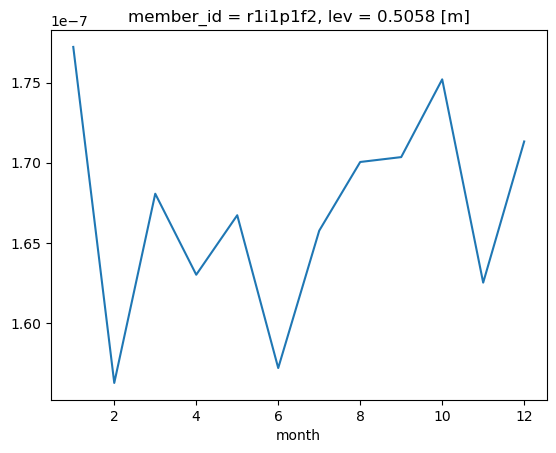

In [21]:
monthgrouped_dmsset_GlbMean.plot(x='month')

In [22]:
monthgrouped_dmsset_Mean= (areacello.areacello*monthgrouped_dmsset
                               )/areacello.areacello.sum(dim=('x','y'))
monthgrouped_dmsset_Mean

<xarray.DataArray (y: 294, x: 362, month: 12)>
dask.array<truediv, shape=(294, 362, 12), dtype=float64, chunksize=(294, 362, 1), chunktype=numpy.ndarray>
Coordinates:
    lat        (y, x) float64 -78.79 -78.79 -78.79 -78.79 ... 50.23 50.01 50.01
    lon        (y, x) float64 72.5 73.5 74.5 75.5 ... 73.05 73.04 73.0 72.99
    member_id  <U8 'r1i1p1f2'
    lev        float64 0.5058
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x

In [23]:
Arct_monthgrouped_dmsset = monthgrouped_dmsset.where((monthgrouped_dmsset.lat>=40)
                                                                         & (monthgrouped_dmsset.lat<=90) 
                                                                         & (monthgrouped_dmsset.lon <= 180 )  
                                                                         & (monthgrouped_dmsset.lon >= -180))
Arct_monthgrouped_dmsset

<xarray.DataArray (month: 12, y: 294, x: 362)>
dask.array<where, shape=(12, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lev        float64 0.5058
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id  <U8 'r1i1p1f2'
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x

In [24]:
Arct_monthgrouped_dmsset_Mean = (areacello.areacello*Arct_monthgrouped_dmsset
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y'))
Arct_monthgrouped_dmsset_Mean

<xarray.DataArray (month: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
    lev        float64 0.5058
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

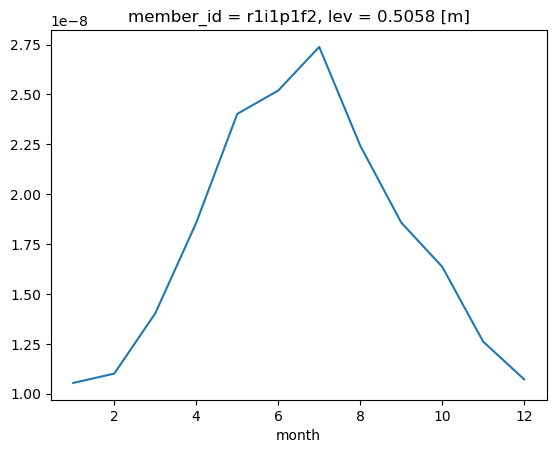

In [25]:
Arct_monthgrouped_dmsset_Mean.plot(x='month')

In [26]:
GL_monthgrouped_dmsset = monthgrouped_dmsset.where((monthgrouped_dmsset.lat>=70)
                                                 & (monthgrouped_dmsset.lat<=85) 
                                                 & (monthgrouped_dmsset.lon <= 10 )  
                                                 & (monthgrouped_dmsset.lon >= -10))
GL_monthgrouped_dmsset

<xarray.DataArray (month: 12, y: 294, x: 362)>
dask.array<where, shape=(12, 294, 362), dtype=float64, chunksize=(1, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lev        float64 0.5058
    lon        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id  <U8 'r1i1p1f2'
    lat        (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: y, x

In [27]:
GL_monthgrouped_dmsset_Mean = (areacello.areacello*GL_monthgrouped_dmsset
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y'))
GL_monthgrouped_dmsset_Mean

<xarray.DataArray (month: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    member_id  <U8 'r1i1p1f2'
    lev        float64 0.5058
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

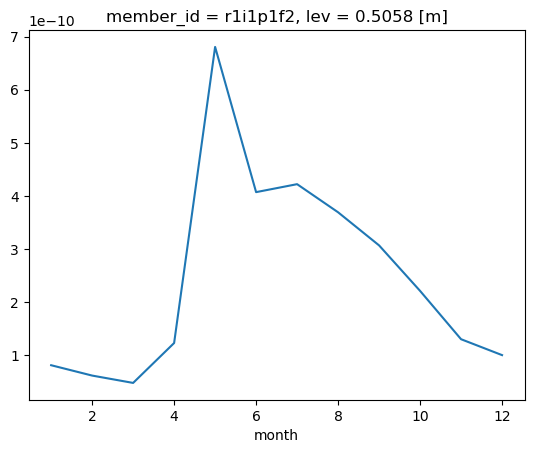

In [28]:
GL_monthgrouped_dmsset_Mean.plot(x='month')

In [29]:
#dmsset
#GL_monthgrouped_dmsset
Arct_month_dmsset = dmsset.where((dmsset.lat>=40)
                                 & (dmsset.lat<=90) 
                                 & (dmsset.lon <= 180 )  
                                 & (dmsset.lon >= -180))
Arct_month_dmsset

<xarray.Dataset>
Dimensions:      (time: 1980, y: 294, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [30]:
Arct_month_dmsset_AreaMean = (areacello.areacello*Arct_month_dmsset
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y')
                              ,keep_attrs=True)
Arct_month_dmsset_AreaMean

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, time: 1980)
Coordinates:
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: axis_nbounds
Data variables:
    dmso         (time) float32 dask.array<chunksize=(4,), meta=np.ndarray>

In [34]:
Arct_month_dmsset_AreaMean_April=Arct_month_dmsset_AreaMean.groupby('time.month')[4]
Arct_month_dmsset_AreaMean_April

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, time: 165)
Coordinates:
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * time         (time) object 1850-04-16 00:00:00 ... 2014-04-16 00:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: axis_nbounds
Data variables:
    dmso         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

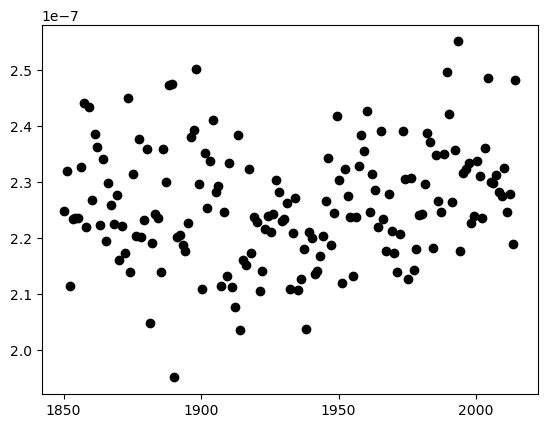

In [37]:
plt_avrg=plt.plot(Arct_month_dmsset_AreaMean_April.time,Arct_month_dmsset_AreaMean_April.dmso,'o', color='black')

In [56]:
GL_dmsset = dmsset.where((dmsset.lat>=70)
                       & (dmsset.lat<=85) 
                       & (dmsset.lon <= 10 )  
                       & (dmsset.lon >= -10))
GL_dmsset

<xarray.Dataset>
Dimensions:      (time: 1980, y: 294, x: 362, nvertex: 4, axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    dmso         (time, y, x) float32 dask.array<chunksize=(4, 294, 362), meta=np.ndarray>
Attributes: (12/57)
    CMIP6_CV_version:        cv=6.2.3.0-7-g2019642
    Conventions:             CF-1.7 CMIP-6.2
    EXPID:                   CNRM-ESM2-1_historical_r1i1p1f2_v2
    activity_id:             CMIP
    arpege_minor_version:    6.3.2
    branch_method:           standard
    ...                      ...
    variant_label:           r1i1p1f2
    xios_commit:             1442-shuffle
    netcdf_tracking_ids:     hdl:21.14100/75203d21-77b5-4211-b329-53b412b9c8a...
    version_id:              v20181206
    intake_esm_varname:      ['dmso']
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Omon.gn

In [64]:
GL_month_dmsset_AreaMean = (areacello.areacello*GL_dmsset
                               ).sum(dim=('x','y'))/areacello.areacello.sum(dim=('x','y')
                              ,keep_attrs=True)
GL_month_dmsset_AreaMean

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, time: 1980)
Coordinates:
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: axis_nbounds
Data variables:
    dmso         (time) float32 dask.array<chunksize=(4,), meta=np.ndarray>

In [70]:
GL_month_dmsset_AreaMean_April=GL_month_dmsset_AreaMean.groupby('time.month')[5]
GL_month_dmsset_AreaMean_April

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, time: 165)
Coordinates:
    lev          float64 0.5058
    lev_bounds   (axis_nbounds) float64 dask.array<chunksize=(2,), meta=np.ndarray>
  * time         (time) object 1850-05-16 12:00:00 ... 2014-05-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(165, 2), meta=np.ndarray>
    member_id    <U8 'r1i1p1f2'
Dimensions without coordinates: axis_nbounds
Data variables:
    dmso         (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

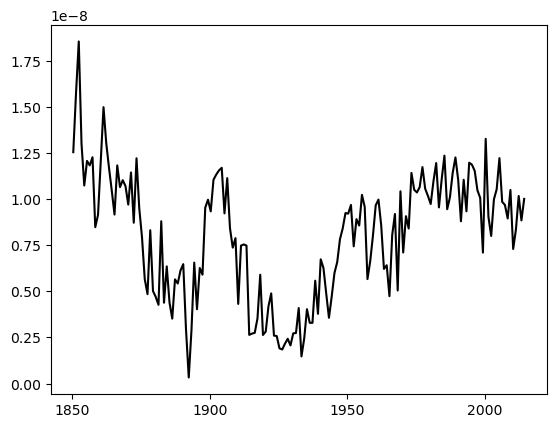

In [71]:
plt_avrg=plt.plot(GL_month_dmsset_AreaMean_April.time,GL_month_dmsset_AreaMean_April.dmso, color='black')

ValueError: x and y must have same first dimension, but have shapes (12,) and (294, 362, 12)

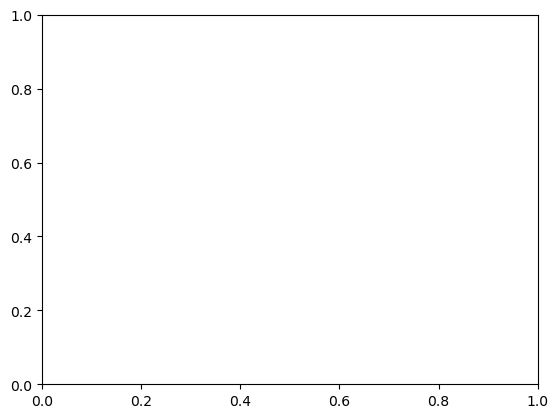

In [53]:
plt.plot(monthgrouped_dmsset_Mean.month,monthgrouped_dmsset_Mean.values)
#monthgrouped_dmsset_Mean.plot(x='month')

### Notes for today:
1- try to add 